In [50]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

In [2]:
df = pd.read_csv("dataset/spambase.csv") # cargando los datos desde un CSV
df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [9]:
df_spam = df.query("spam == 1").drop("spam", axis=1)
df_no_spam = df.query("spam == 0").drop("spam", axis=1)
max_word_freq_spam = df_spam.mean().sort_values(ascending=False)
max_word_freq_non_spam = df_no_spam.mean().sort_values(ascending=False)
df_spam.mean().sort_values(ascending=False)
df_spam.mean().sort_values(ascending=False)
max10_word_freq_spam = list(max_word_freq_spam[:10].index)
max10_word_freq_non_spam = list(max_word_freq_non_spam[:10].index)
print("The 10 most frequent words in SPAM mails are:")
print(max10_word_freq_spam)
print("The 10 most frequent words in no SPAM mails are:")
print(max10_word_freq_non_spam)
print("Common words in SPAM and non-SPAM mails:")
print([word for word in max10_word_freq_non_spam if word in max10_word_freq_spam])

The 10 most frequent words in SPAM mails are:
['word_freq_you', 'word_freq_your', 'word_freq_will', 'word_freq_free', 'word_freq_our', 'char_freq_!', 'word_freq_all', 'word_freq_mail', 'word_freq_email', 'word_freq_business']
The 10 most frequent words in no SPAM mails are:
['word_freq_you', 'word_freq_george', 'word_freq_hp', 'word_freq_will', 'word_freq_your', 'word_freq_hpl', 'word_freq_re', 'word_freq_edu', 'word_freq_address', 'word_freq_meeting']
Common words in SPAM and non-SPAM mails:
['word_freq_you', 'word_freq_will', 'word_freq_your']


2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [12]:
# Obtenemos los atributos y target
X = (df.drop(columns="spam") * 100).astype(int)
y = df["spam"]

# Se separa el dataset en entrenamiento y evaluación
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [20]:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB()

4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [22]:
clf_lr = LogisticRegression(random_state=0, class_weight="balanced")
clf_lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

Text(0.5, 1.0, 'Clasificador de regresión logística')

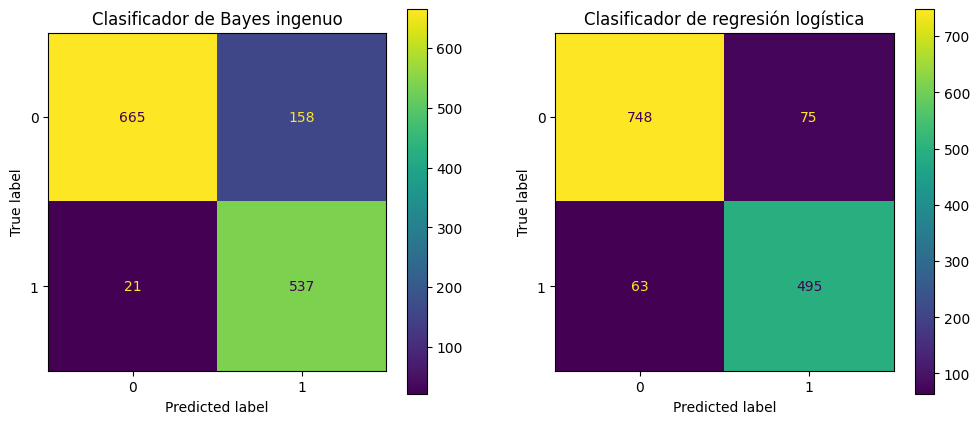

In [41]:
# For Naive Bayes
y_pred_mnb = clf_mnb.predict(X_test)

# For Logistic Regression
y_pred_lr = clf_lr.predict(X_test_scaled)

fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 5)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_mnb, ax=axs[0])
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lr, ax=axs[1])
axs[0].set_title("Clasificador de Bayes ingenuo")
axs[1].set_title("Clasificador de regresión logística")

Para el problema de detección de spam, los errores de tipo I (falsos positivos) son más importantes porque implican la pérdida de correos legítimos, lo cual puede tener consecuencias significativas para el usuario.

6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [42]:
# Calcular precisión y recuperación
print ("Precisión y recuperación para Bayes ingenuo")
precision_mnb = precision_score(y_test, y_pred_mnb, zero_division=0)
recall_mnb = recall_score(y_test, y_pred_mnb, zero_division=0)

print(f"\tPrecisión: {precision_mnb}")
print(f"\tRecuperación: {recall_mnb}")

print ("Precisión y recuperación para Regresión logística")
precision_lr = precision_score(y_test, y_pred_lr, zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, zero_division=0)

print(f"\tPrecisión: {precision_lr}")
print(f"\tRecuperación: {recall_lr}")

Precisión y recuperación para Bayes ingenuo
	Precisión: 0.7726618705035971
	Recuperación: 0.9623655913978495
Precisión y recuperación para Regresión logística
	Precisión: 0.868421052631579
	Recuperación: 0.8870967741935484


7.  Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

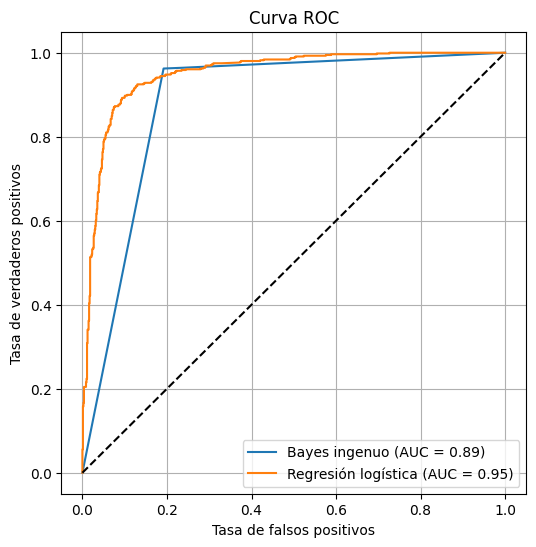

In [49]:
y_prob_mnb = clf_mnb.predict_proba(X_test)[:, 1]
y_prob_lr = clf_lr.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr_mnb, tpr_mnb, _ = roc_curve(y_true=y_test, y_score=y_prob_mnb)
fpr_lr, tpr_lr, _ = roc_curve(y_true=y_test, y_score=y_prob_lr)

# Calcular el área bajo la curva ROC
roc_auc_mnb = roc_auc_score(y_true=y_test, y_score=y_prob_mnb)
roc_auc_lr = roc_auc_score(y_true=y_test, y_score=y_prob_lr)

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr_mnb, tpr_mnb, label=f"Bayes ingenuo (AUC = {roc_auc_mnb:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión logística (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()